In [1]:
import time

import pandas as pd

file_path = '2023.xlsx'
data = pd.read_excel(file_path)

def convert_unixtime_to_datetime(unixtime):
    return pd.to_datetime(unixtime, unit='D', origin='1899-12-30')

# Преобразование столбцов с Unix time в стандартное время
data['Т события'] = data['Т события'].apply(convert_unixtime_to_datetime)
data['Крайний срок'] = data['Крайний срок'].apply(convert_unixtime_to_datetime)



# Сохранение данных
data.to_excel('data4.xlsx', index=False)


ValueError: '2023-01-01 01:01:00' is not compatible with origin='1899-12-30'; it must be numeric with a unit specified

In [7]:
!! pip install openstreetmap

['Requirement already satisfied: openstreetmap in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (0.0.19)',
 'Requirement already satisfied: requests in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from openstreetmap) (2.27.1)',
 'Requirement already satisfied: lxml in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from openstreetmap) (4.8.0)',
 'Requirement already satisfied: certifi>=2017.4.17 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from requests->openstreetmap) (2021.10.8)',
 'Requirement already satisfied: charset-normalizer~=2.0.0 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from requests->openstreetmap) (2.0.4)',
 'Requirement already satisfied: idna<4,>=2.5 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from requests->openstreetmap) (3.3)',
 'Requirement already satisfied: urllib3<1.27,>=1.21.1 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-pa

In [8]:
!! pip install osmnx

['Requirement already satisfied: osmnx in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (1.8.1)',
 'Requirement already satisfied: pandas>=1.1 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (1.4.2)',
 'Requirement already satisfied: shapely>=2.0 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (2.0.2)',
 'Requirement already satisfied: numpy>=1.20 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (1.21.5)',
 'Requirement already satisfied: geopandas>=0.12 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (0.14.2)',
 'Requirement already satisfied: requests>=2.27 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (2.27.1)',
 'Requirement already satisfied: networkx>=2.5 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from osmnx) (2.7.1)',
 'Requirement already satisfied: packaging in /Users/zamotaev

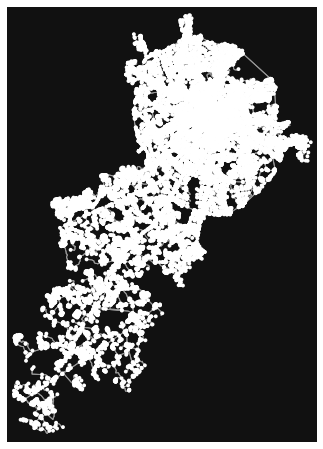

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
import osmnx as ox

# Загрузка карты дорог для определенной области Москвы
G = ox.graph_from_place('Moscow, Russia', network_type='drive')

# Вы можете визуализировать карту, чтобы проверить её
ox.plot_graph(G)


In [151]:
import pandas as pd
from geopy.distance import geodesic
from datetime import timedelta

# Координаты бригад
brigades = {
    "A": (55.8181190490723, 37.5789909362793),
    "B": (55.7531852722168, 37.4102668762207),
    "C": (55.793628692627, 37.7089691162109),
    "D": (55.6388854980469, 37.7610702514648),
    # "D1": (55.6175193786621, 37.6186752319336)
}


incidents = pd.read_excel('data2new.xlsx')


In [152]:
# обработка данных
incidents['Широта'] = pd.to_numeric(incidents['Широта'], errors='coerce')
incidents['Долгота'] = pd.to_numeric(incidents['Долгота'], errors='coerce')
incidents = incidents.dropna(subset=['Широта', 'Долгота'])

In [153]:
# инициализация словаря
brigade_availability = {brigade: pd.Timestamp.min for brigade in brigades.keys()}

In [154]:
# Инициализация словаря для отслеживания нагрузки бригад
brigade_workload = {brigade: 0 for brigade in brigades.keys()}

In [155]:
# Обновите функцию распределения для учета рабочей нагрузки
def update_brigade_workload(brigade, additional_workload):
    brigade_workload[brigade] += additional_workload

In [156]:
def calculate_travel_time(distance, speed=40):
    return distance / speed 

In [157]:
import osmnx as ox
import networkx as nx

# Получение графа дорог для Москвы
G = ox.graph_from_place('Moscow, Russia', network_type='drive')
G = ox.project_graph(G)

# Преобразование графа
G = nx.convert_node_labels_to_integers(G)

In [158]:
def get_shortest_path_length(G, start_point, end_point):
    # Получение ближайших узлов к точкам начала и конца
    start_node = ox.distance.nearest_nodes(G, start_point[1], start_point[0])
    end_node = ox.distance.nearest_nodes(G, end_point[1], end_point[0])  
    
    # Расчет кратчайшего пути и его длины
    length = nx.shortest_path_length(G, start_node, end_node, weight='length')
    return length / 1000

In [159]:
def is_brigade_available(brigade, start_time):
    return brigade_availability[brigade] <= start_time

In [160]:
def update_brigade_availability(brigade, end_time):
    brigade_availability[brigade] = end_time


In [161]:
# Алгоритм ближайшего соседа
def assign_to_nearest_available_brigade(incidents, brigades, G):
    assignments = []
    # Сортировка инцидентов по приоритету перед назначением
    sorted_incidents = incidents.sort_values(by='PRIORITY', ascending=False)
    for _, incident in sorted_incidents.iterrows():  # Используйте sorted_incidents здесь
        incident_coord = (incident['Широта'], incident['Долгота'])
        incident_start = incident['Т события']

        nearest_brigade, min_distance = None, float('inf')

        for brigade_name, brigade_coord in brigades.items():
            path_length = get_shortest_path_length(G, brigade_coord, incident_coord)
            travel_time = calculate_travel_time(path_length)
            estimated_arrival = incident_start + pd.to_timedelta(travel_time, unit='h')

            if is_brigade_available(brigade_name, estimated_arrival) and path_length < min_distance:
                nearest_brigade, min_distance = brigade_name, path_length

        if nearest_brigade is not None:
            update_brigade_availability(nearest_brigade, estimated_arrival)
            # Обновление рабочей нагрузки бригады должно происходить только после успешного назначения
            update_brigade_workload(nearest_brigade, 1)  # Предполагается, что функция update_brigade_workload уже определена
            assignments.append((incident['№ МИ'], nearest_brigade))
        else:
            assignments.append((incident['№ МИ'], "No available brigade"))

    return assignments

# Важно: Убедитесь, что функция update_brigade_workload корректно определена и обновляет нагрузку бригады в соответствии с вашей логикой учета работы.
# Этот код предполагает, что у каждого инцидента есть уникальный идентификатор '№ МИ', время начала 'Т события', координаты 'Широта' и 'Долгота', и приоритет 'PRIORITY'.
# Функция get_shortest_path_length должна быть определена для расчета длины кратчайшего пути между двумя точками на графе дорог.


In [127]:
def assign_to_nearest_available_brigade_with_greedy_approach(incidents, brigades, G):
    assignments = []
    # Предполагаем, что у каждой бригады есть начальная рабочая мощность или максимальное количество задач, которые она может взять на себя
    brigade_capacity = {brigade: 10 for brigade in brigades.keys()}  # Примерное значение

    sorted_incidents = incidents.sort_values(by='PRIORITY', ascending=False)
    for _, incident in sorted_incidents.iterrows():
        best_choice = None
        min_score = float('inf')

        for brigade_name, brigade_coord in brigades.items():
            if brigade_capacity[brigade_name] > 0:  # Убедитесь, что бригада не перегружена
                path_length = get_shortest_path_length(G, brigade_coord, (incident['Широта'], incident['Долгота']))
                score = path_length - brigade_capacity[brigade_name]  # Примерный критерий: минимизируем расстояние и учитываем оставшуюся мощность

                if score < min_score:
                    best_choice = brigade_name
                    min_score = score

        if best_choice:
            brigade_capacity[best_choice] -= 1  # Уменьшаем доступную мощность бригады
            assignments.append((incident['№ МИ'], best_choice))
        else:
            assignments.append((incident['№ МИ'], "No available brigade"))

    return assignments


In [162]:
def distribute_daily_incidents(incidents, brigades, start_date, end_date, G):
    daily_assignments = {}
    current_date = start_date
    while current_date <= end_date:
        daily_incidents = incidents[incidents['Т события'].dt.date == current_date.date()]
        daily_assignments[current_date] = assign_to_nearest_available_brigade(daily_incidents, brigades, G)
        current_date += timedelta(days=1)
    return daily_assignments

In [163]:
# Распределение инцидентов на каждый день
start_date = incidents['Т события'].min()
end_date = incidents['Т события'].max()
# end_date = incidents['Крайний срок'].max()
daily_distributions = distribute_daily_incidents(incidents, brigades, start_date, end_date, G)

In [164]:
def travel_time():
    calculate_travel_time


In [165]:
# Сохранение результатов в файл с добавлением времени и типа поломок
output = []
for day, assignments in daily_distributions.items():
    for assignment in assignments:
        
        # Крайний срок
        dead_line = incident_record['Крайний срок'].strftime('%Y-%m-%d %H:%M:%S')
        # Находим соответствующую запись о происшествии для получения времени и типа поломки
        incident_record = incidents[incidents['№ МИ'] == assignment[0]].iloc[0]

        # Форматирование даты и времени начала происшествия
        datetime_start_format = day.strftime('%Y-%m-%d') + ' ' + incident_record['Т события'].strftime('%H:%M:%S')

        # Расчет и форматирование времени окончания работы над происшествием
        # Предполагается, что `incident_end` это время окончания работы над происшествием
        # Если у вас есть другой способ расчета времени окончания, замените следующую строку соответствующей логикой
        datetime_end_format = travel_time()

        output.append({
            'Date': day.strftime('%Y-%m-%d'),
            # 'Time Start': datetime_start_format,  # Время начала происшествия
            # 'Time End': datetime_end_format,  # Время окончания работы над происшествием
            'Incident ID': assignment[0],
            'Assigned Brigade': assignment[1],
            'Incident Type': incident_record['Техописание'],  # Тип поломки
            'Time Start': datetime_start_format,  # Время начала происшествия
            'Time End': datetime_end_format,  # Время окончания работы над происшествием
            'Deadline': dead_line
        })

output_df = pd.DataFrame(output)
output_df.to_csv('daily_assignments_with_time_and_type_and_end.csv', index=False)



In [40]:
!! pip install folium

['Requirement already satisfied: folium in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (0.15.1)',
 'Requirement already satisfied: branca>=0.6.0 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from folium) (0.7.0)',
 'Requirement already satisfied: requests in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from folium) (2.27.1)',
 'Requirement already satisfied: jinja2>=2.9 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from folium) (2.11.3)',
 'Requirement already satisfied: xyzservices in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from folium) (2023.10.1)',
 'Requirement already satisfied: numpy in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from folium) (1.21.5)',
 'Requirement already satisfied: MarkupSafe>=0.23 in /Users/zamotaevrodion/opt/anaconda3/lib/python3.9/site-packages (from jinja2>=2.9->folium) (2.0.1)',
 'Requirement already satisfied: idna<4,>=2.5 in

In [41]:
import folium

# Создаем карту с центром в Москве
m = folium.Map(location=[55.7558, 37.6173], zoom_start=10)

# Добавляем маркеры для происшествий
for _, incident in incidents.iterrows():
    folium.Marker(
        [incident['Широта'], incident['Долгота']],
        popup=f"Происшествие: {incident['№ МИ']}",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Добавляем маркеры для бригад
for brigade_name, location in brigades.items():
    folium.Marker(
        location,
        popup=f"Бригада: {brigade_name}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Сохраняем карту в HTML-файл
m.save('map.html')
